In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import math
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BMD-2.csv to BMD-2.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['BMD-2.csv']))

In [4]:
df.describe()

,Age,Weight_kg,Height_cm,BMD
count,169.000000,169.000000,169.000000,169.000000
mean,63.631531,64.665680,160.254438,0.783104
std,12.356936,11.537171,7.928272,0.166529
min,35.814058,36.000000,142.000000,0.407600
25%,54.424211,56.000000,154.000000,0.670800
50%,63.487837,64.500000,160.500000,0.786100
75%,72.080558,73.000000,166.000000,0.888800
max,88.753795,96.000000,177.000000,1.362400


In [5]:
# 1. Data Dimensionality
# Total number of patients
total_patients = df.shape[0]

# Number of attributes (categories)
number_of_attributes = df.shape[1]

# Data types of the attributes
data_types = df.dtypes

# Checking for missing values
missing_values = df.isnull().sum()

#Number of patients in each target class
Fracture_counts = df['Fracture'].value_counts()


# Printing the results
print(f"Total number of patients: {total_patients}")
print(f"Number of attributes: {number_of_attributes}")
print("\nData Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)
print("\nNumber of patients in each target class:")
print(Fracture_counts)

Total number of patients: 169
Number of attributes: 5

Data Types:
Age          float64
Weight_kg    float64
Height_cm    float64
BMD          float64
Fracture      object
dtype: object

Missing Values:
Age          0
Weight_kg    0
Height_cm    0
BMD          0
Fracture     0
dtype: int64

Number of patients in each target class:
Fracture
no fracture    119
fracture        50
Name: count, dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, r2_score, accuracy_score, classification_report
from sklearn import tree

In [7]:
X = df.drop('Fracture', axis=1)
Y = df['Fracture']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Accuracy with Decision Tree classifier, depth = 4:  0.9349112426035503

              precision    recall  f1-score   support

    fracture       0.84      0.96      0.90        50
 no fracture       0.98      0.92      0.95       119

    accuracy                           0.93       169
   macro avg       0.91      0.94      0.92       169
weighted avg       0.94      0.93      0.94       169

Predicted    fracture  no fracture
Actual                            
fracture           48            2
no fracture         9          110


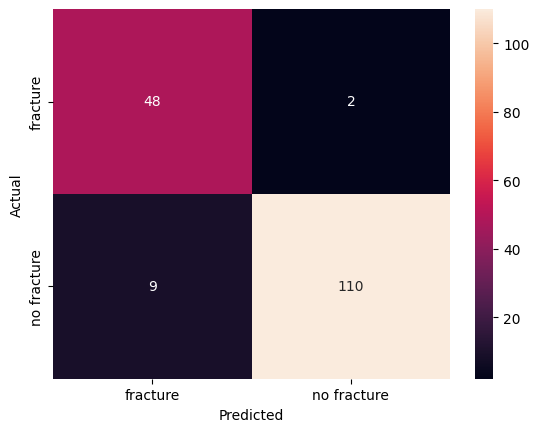

[0.10787385637545016, 0.016594326522350145, 0.07154012572056653, 0.8039916913816332]


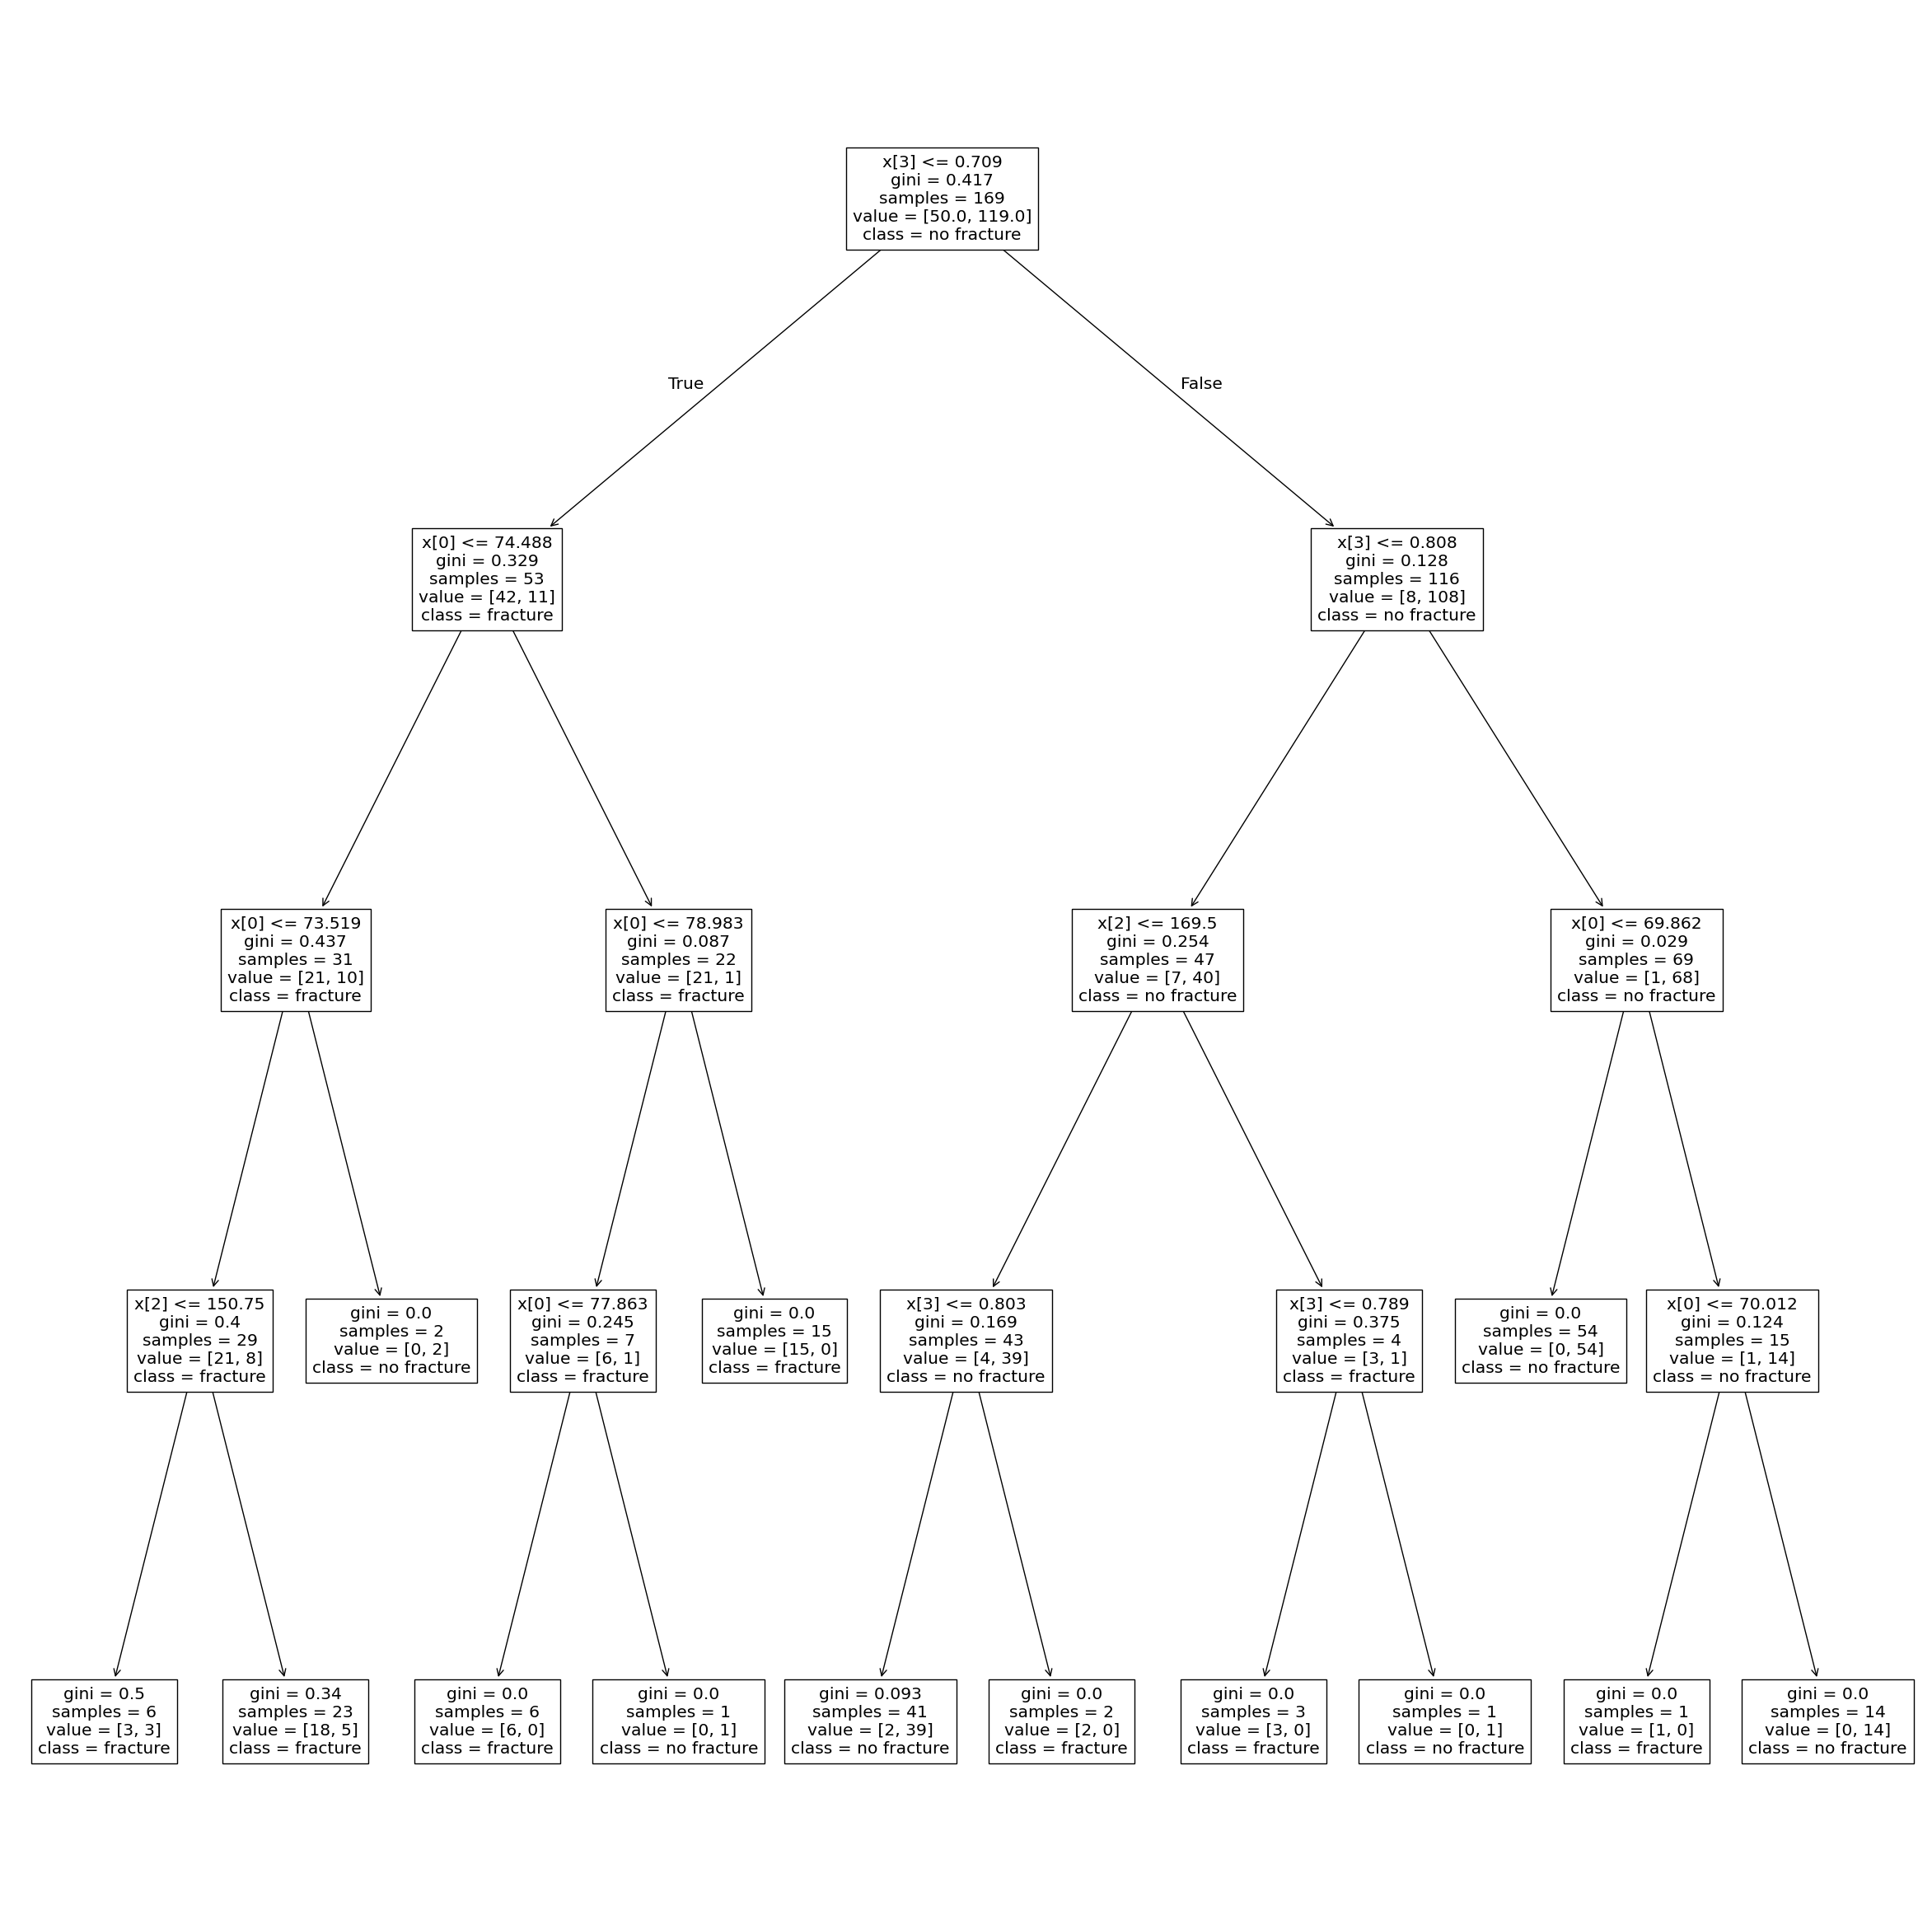

In [16]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X,Y)
Y_pred=clf.predict(X)
print('Accuracy with Decision Tree classifier, depth = 4: ',metrics.accuracy_score(Y, Y_pred))
print()
print(classification_report(Y, Y_pred))

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')
print(confusion_matrix)
plt.show()

importances = list(clf.feature_importances_)
#Print out the feature and importances
print (importances)

fig = plt.figure(figsize=(30, 30))
tree.plot_tree(clf.fit(X,Y), class_names=['fracture','no fracture'])
plt.show()

Accuracy with Decision Tree classifier, depth = 8:  0.9940828402366864

              precision    recall  f1-score   support

    fracture       0.98      1.00      0.99        50
 no fracture       1.00      0.99      1.00       119

    accuracy                           0.99       169
   macro avg       0.99      1.00      0.99       169
weighted avg       0.99      0.99      0.99       169



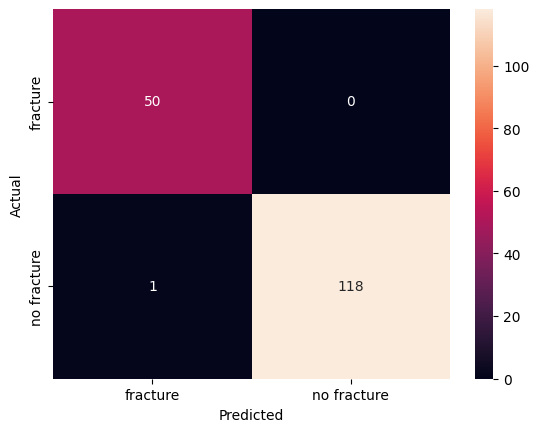

[0.16808471373173034, 0.04921767930561901, 0.1017792778900197, 0.680918329072631]


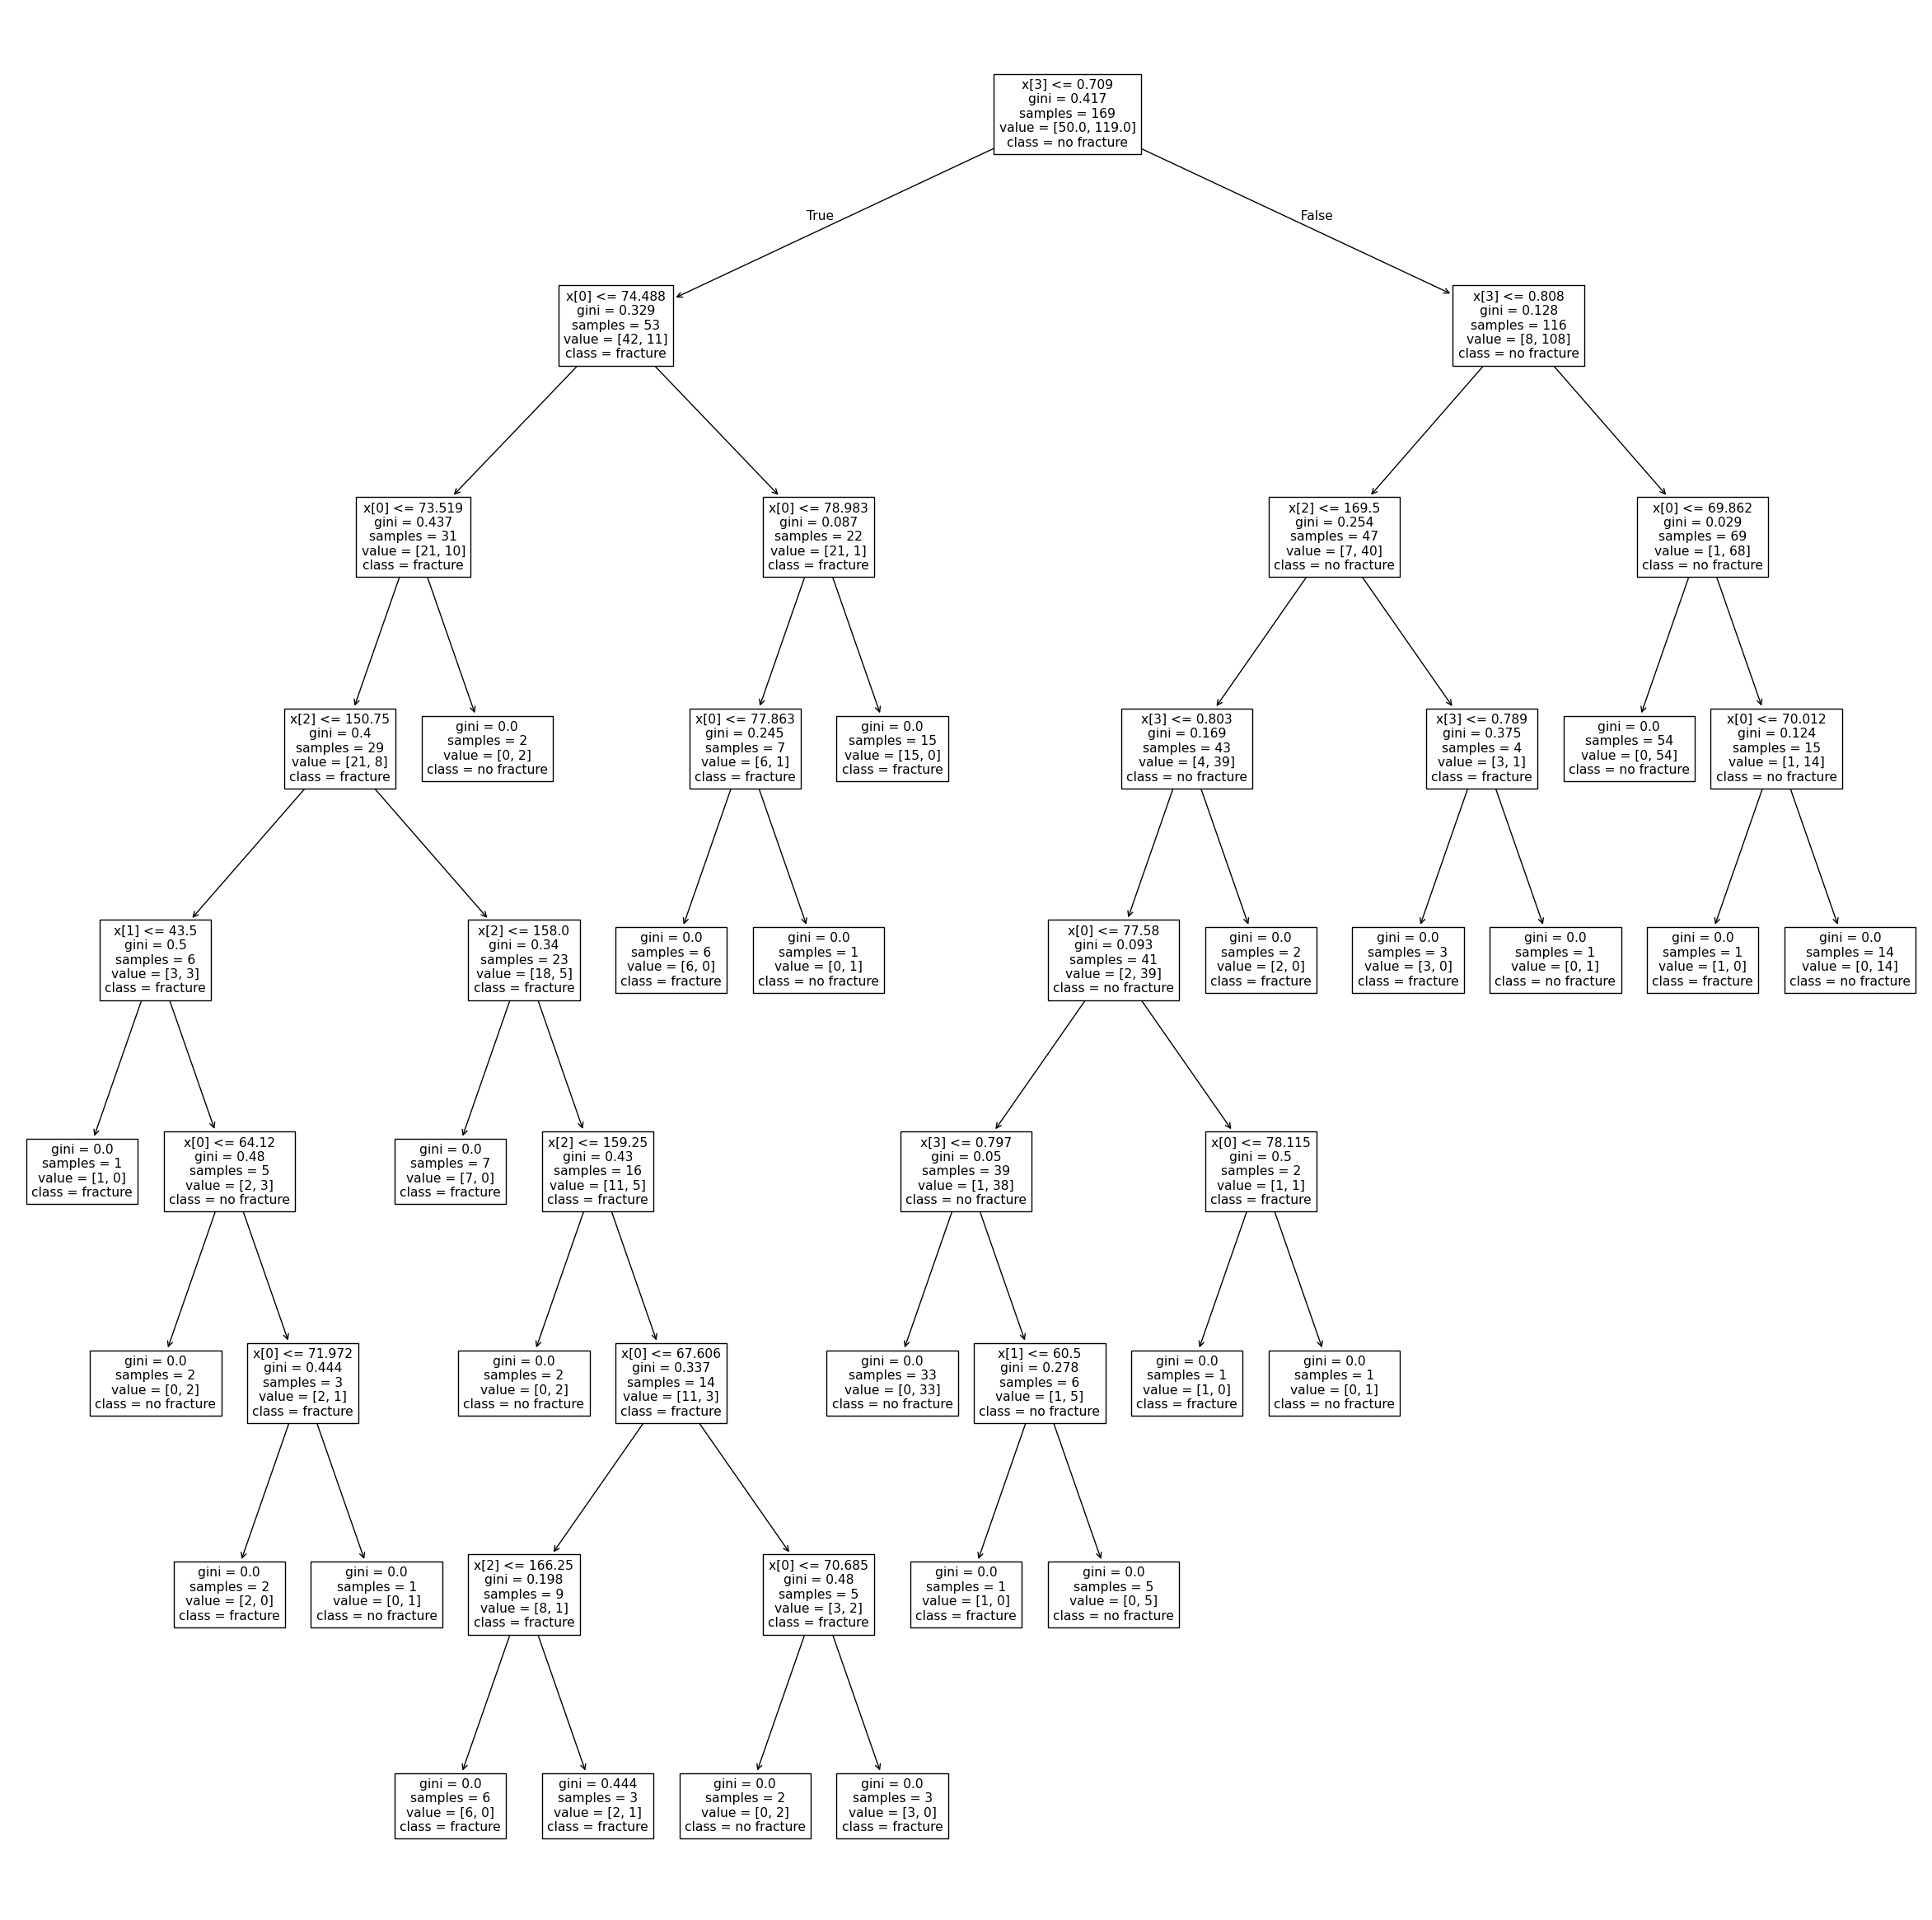

In [17]:
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X,Y)
Y_pred=clf.predict(X)

print('Accuracy with Decision Tree classifier, depth = 8: ',metrics.accuracy_score(Y, Y_pred))
print()
print(classification_report(Y, Y_pred))

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')

plt.show()

importances = list(clf.feature_importances_)
#Print out the feature and importances
print (importances)

fig = plt.figure(figsize=(30, 30))
tree.plot_tree(clf.fit(X,Y), class_names=['fracture','no fracture'])
plt.show()

Accuracy:  0.9940828402366864


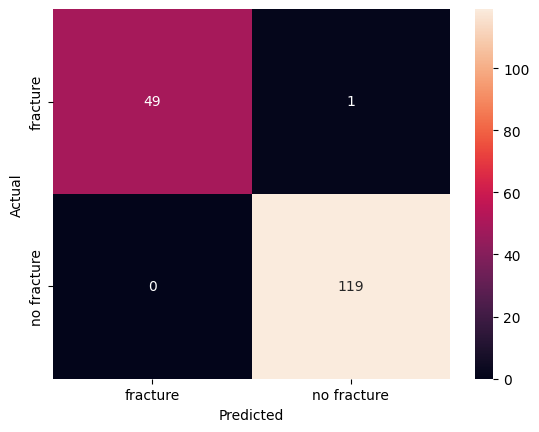

[0.18885345397672332, 0.11707513385236659, 0.12956605201827992, 0.5645053601526302]


In [10]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')

print('Accuracy: ', metrics.accuracy_score(Y, Y_pred))
plt.show()

importances = list(clf.feature_importances_)
#Print out the feature and importances
print (importances)


Accuracy:  0.9881656804733728


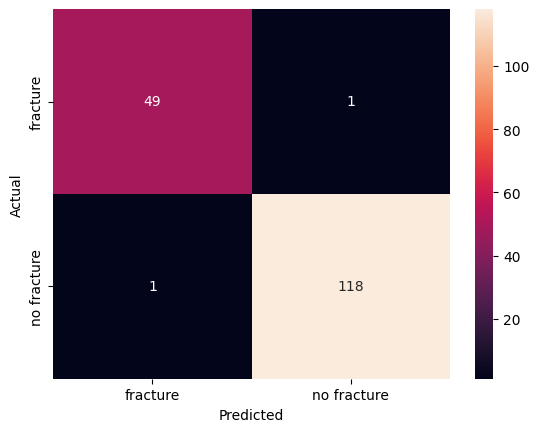

[0.21224999982203552, 0.13709164469670948, 0.103394996082279, 0.5472633593989761]


In [12]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

importances = list(clf.feature_importances_)
#Print out the feature and importances
print (importances)


Accuracy with Ridge Regularization: 0.8284023668639053

              precision    recall  f1-score   support

    fracture       0.80      0.56      0.66        50
 no fracture       0.84      0.94      0.89       119

    accuracy                           0.83       169
   macro avg       0.82      0.75      0.77       169
weighted avg       0.83      0.83      0.82       169

Predicted    fracture  no fracture
Actual                            
fracture           28           22
no fracture         7          112


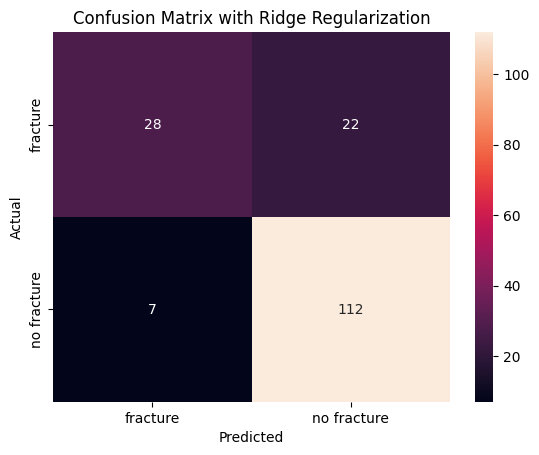

In [13]:
# Applying Logistic Regression with Ridge Regularization
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
ridge_model.fit(X,Y)
ridge_pred = ridge_model.predict(X)
ridge_accuracy = accuracy_score(Y, ridge_pred)
print("Accuracy with Ridge Regularization:", ridge_accuracy)
print()
print(classification_report(Y, ridge_pred))

# Confusion matrix for Ridge regularization
ridge_conf_matrix = pd.crosstab(Y, ridge_pred, rownames=['Actual'], colnames=['Predicted'])
print(ridge_conf_matrix)

# Heatmap for confusion matrix with Ridge Regularization
sn.heatmap(ridge_conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix with Ridge Regularization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy with Lasso Regularization: 0.863905325443787

              precision    recall  f1-score   support

    fracture       0.81      0.70      0.75        50
 no fracture       0.88      0.93      0.91       119

    accuracy                           0.86       169
   macro avg       0.85      0.82      0.83       169
weighted avg       0.86      0.86      0.86       169

Predicted    fracture  no fracture
Actual                            
fracture           35           15
no fracture         8          111


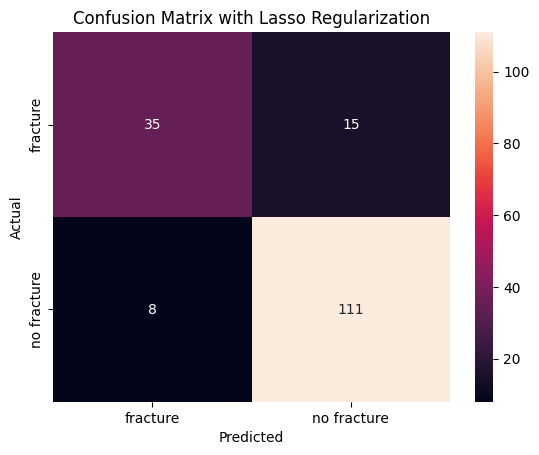

In [14]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso_model.fit(X, Y)
lasso_pred = lasso_model.predict(X)
lasso_accuracy = accuracy_score(Y, lasso_pred)
print("Accuracy with Lasso Regularization:", lasso_accuracy)
print()
print(classification_report(Y, lasso_pred))

lasso_conf_matrix = pd.crosstab(Y, lasso_pred, rownames=['Actual'], colnames=['Predicted'])
print(lasso_conf_matrix)

# Heatmap for confusion matrix with Lasso Regularization
sn.heatmap(lasso_conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix with Lasso Regularization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()